# Phase - 4: Unsupervised ML (Clustering)

In [1]:
# Importing libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the datasets
IPC_crimes_data = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
children_crimes_data = pd.read_csv("03_District_wise_crimes_committed_against_children_2001_2012.csv")
women_crimes_data = pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")
sc_crimes_data = pd.read_csv("02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
st_crimes_data = pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")

## District wise crimes committed classified by IPC from 2001 to 2012

In [3]:
IPC_crimes_data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [4]:
# Display the shape of the dataframe
IPC_crimes_data.shape

(9017, 33)

In [5]:
# Display the names of the columns
IPC_crimes_data.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [6]:
# Display the datatypes of all the columns
IPC_crimes_data.dtypes

STATE/UT                                               object
DISTRICT                                               object
YEAR                                                    int64
MURDER                                                  int64
ATTEMPT TO MURDER                                       int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               int64
RAPE                                                    int64
CUSTODIAL RAPE                                          int64
OTHER RAPE                                              int64
KIDNAPPING & ABDUCTION                                  int64
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS             int64
KIDNAPPING AND ABDUCTION OF OTHERS                      int64
DACOITY                                                 int64
PREPARATION AND ASSEMBLY FOR DACOITY                    int64
ROBBERY                                                 int64
BURGLARY                                                int64
THEFT   

In [7]:
# Checking for the unique values in the State/UT column
IPC_crimes_data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [8]:
# Checking for the null values in the dataset
IPC_crimes_data.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

No null values present in the dataset.

In [9]:
# Checking for the duplicated rows in the dataset
IPC_crimes_data.duplicated().sum()

0

No duplicated rows present in the dataset.

In [10]:
# Renaming DELHI UT value in STATE/UT column to DELHI
IPC_crimes_data['STATE/UT'] = IPC_crimes_data['STATE/UT'].replace('DELHI UT', 'DELHI')

In [11]:
# Dropping rows which have TOTAL as value in DISTRICT column
IPC_crimes_data = IPC_crimes_data[IPC_crimes_data['DISTRICT'] != 'TOTAL'].reset_index(drop = True)

In [12]:
# Dropping TOTAL IPC CRIMES column
IPC_crimes_data.drop('TOTAL IPC CRIMES', axis = 1, inplace = True)

In [13]:
# Display the shape of the dataframe after updation
IPC_crimes_data.shape

(8609, 32)

In [14]:
# Adding up total crimes classified by IPC
IPC_crimes_data['TOTAL IPC CRIMES'] = IPC_crimes_data.iloc[:, 3:].sum(axis = 1)

In [15]:
IPC_crimes_data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4449
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4567
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,6627
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3358
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,7600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,DELHI,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8605,DELHI,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,8443
8606,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,67
8607,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,876


## District wise crimes committed against children from 2001 to 2012 

In [16]:
children_crimes_data

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9011,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7
9013,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,25


In [17]:
# Display the shape of the dataframe
children_crimes_data.shape

(9015, 15)

In [18]:
# Display the names of the columns
children_crimes_data.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total'],
      dtype='object')

In [19]:
# Display the datatypes of all the columns
children_crimes_data.dtypes

STATE/UT                              object
DISTRICT                              object
Year                                   int64
Murder                               float64
Rape                                 float64
Kidnapping and Abduction             float64
Foeticide                            float64
Abetment of suicide                  float64
Exposure and abandonment             float64
Procuration of minor girls           float64
Buying of girls for prostitution     float64
Selling of girls for prostitution    float64
Prohibition of child marriage act    float64
Other Crimes                         float64
Total                                  int64
dtype: object

In [20]:
# Checking for the unique values in the State/UT column
children_crimes_data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [21]:
# Checking for the null values in the dataset
children_crimes_data.isnull().sum()

STATE/UT                              0
DISTRICT                              0
Year                                  0
Murder                               11
Rape                                 11
Kidnapping and Abduction             11
Foeticide                            11
Abetment of suicide                  11
Exposure and abandonment             11
Procuration of minor girls           11
Buying of girls for prostitution     11
Selling of girls for prostitution    11
Prohibition of child marriage act    11
Other Crimes                         11
Total                                 0
dtype: int64

Null values present in the dataset.

In [22]:
# Imputing null values with 0
children_crimes_data.fillna(0, inplace = True)

In [23]:
# Renaming Year column to YEAR
children_crimes_data.rename(columns = {'Year': 'YEAR'}, inplace = True)

In [24]:
# Dropping rows which have TOTAL as value in DISTRICT column
children_crimes_data = children_crimes_data[children_crimes_data['DISTRICT'] != 'TOTAL'].reset_index(drop = True)

In [25]:
# Checking for the duplicated rows in the dataset
children_crimes_data.duplicated().sum()

0

No duplicated rows present in the dataset.

In [26]:
# Display the shape of the dataframe after updation
children_crimes_data.shape

(8603, 15)

In [27]:
# Dropping Total column
children_crimes_data.drop('Total', axis = 1, inplace = True)

In [28]:
# Adding up total crimes against children
children_crimes_data['TOTAL CRIMES AGAINST CHILDREN'] = children_crimes_data.iloc[:, 3:].sum(axis = 1)

In [29]:
children_crimes_data = children_crimes_data[['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL CRIMES AGAINST CHILDREN']]

In [30]:
children_crimes_data

,STATE/UT,DISTRICT,YEAR,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0.0
1,ANDHRA PRADESH,ANANTAPUR,2001,66.0
2,ANDHRA PRADESH,CHITTOOR,2001,0.0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0
...,...,...,...,...
8598,DELHI,STF,2012,0.0
8599,DELHI,WEST,2012,542.0
8600,LAKSHADWEEP,LAKSHADWEEP,2012,0.0
8601,PUDUCHERRY,KARAIKAL,2012,7.0


## District wise crimes committed against women from 2001 to 2012 

In [31]:
women_crimes_data

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [32]:
# Display the shape of the dataframe
women_crimes_data.shape

(9017, 10)

In [33]:
# Display the names of the columns
women_crimes_data.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [34]:
# Display the datatypes of all the columns
women_crimes_data.dtypes

STATE/UT                                               object
DISTRICT                                               object
Year                                                    int64
Rape                                                    int64
Kidnapping and Abduction                                int64
Dowry Deaths                                            int64
Assault on women with intent to outrage her modesty     int64
Insult to modesty of Women                              int64
Cruelty by Husband or his Relatives                     int64
Importation of Girls                                    int64
dtype: object

In [35]:
# Checking for the unique values in the State/UT column
women_crimes_data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [36]:
# Checking for the null values in the dataset
women_crimes_data.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

No null values present in the dataset.

In [37]:
# Checking for the duplicated rows in the dataset
women_crimes_data.duplicated().sum()

0

No duplicated rows present in the dataset.

In [38]:
# Renaming Year column to YEAR
women_crimes_data.rename(columns = {'Year': 'YEAR'}, inplace = True)

In [39]:
# Dropping rows which have TOTAL as value in DISTRICT column
women_crimes_data = women_crimes_data[women_crimes_data['DISTRICT'] != 'TOTAL'].reset_index(drop = True)

In [40]:
# Display the shape of the dataframe after updation
women_crimes_data.shape

(8609, 10)

In [41]:
# Adding up total crimes against women
women_crimes_data['TOTAL CRIMES AGAINST WOMEN'] = women_crimes_data.iloc[:, 3:].sum(axis = 1)
women_crimes_data = women_crimes_data[['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL CRIMES AGAINST WOMEN']]

In [42]:
women_crimes_data

,STATE/UT,DISTRICT,YEAR,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
8604,DELHI,STF,2012,0
8605,DELHI,WEST,2012,739
8606,LAKSHADWEEP,LAKSHADWEEP,2012,2
8607,PUDUCHERRY,KARAIKAL,2012,11


## District wise crimes committed against SCs from 2001 to 2012

In [43]:
sc_crimes_data

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


In [44]:
# Display the shape of the dataframe
sc_crimes_data.shape

(9018, 13)

In [45]:
# Display the names of the columns
sc_crimes_data.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'],
      dtype='object')

In [46]:
# Display the datatypes of all the columns
sc_crimes_data.dtypes

STATE/UT                                object
DISTRICT                                object
Year                                     int64
Murder                                   int64
Rape                                     int64
Kidnapping and Abduction                 int64
Dacoity                                  int64
Robbery                                  int64
Arson                                    int64
Hurt                                     int64
Prevention of atrocities (POA) Act       int64
Protection of Civil Rights (PCR) Act     int64
Other Crimes Against SCs                 int64
dtype: object

In [47]:
# Checking for the unique values in the State/UT column
sc_crimes_data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [48]:
# Checking for the null values in the dataset
sc_crimes_data.isnull().sum()

STATE/UT                                0
DISTRICT                                0
Year                                    0
Murder                                  0
Rape                                    0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

No null values present in the dataset.

In [49]:
# Checking for the duplicated rows in the dataset
sc_crimes_data.duplicated().sum()

2

Duplicated rows present in the dataset.

In [50]:
# Dropping the duplicated rows
sc_crimes_data.drop_duplicates(keep = 'first', inplace = True)

In [51]:
# Renaming Year column to YEAR
sc_crimes_data.rename(columns = {'Year': 'YEAR'}, inplace = True)

In [52]:
# Dropping rows which have TOTAL as value in DISTRICT column
sc_crimes_data = sc_crimes_data[sc_crimes_data['DISTRICT'] != 'TOTAL'].reset_index(drop = True)

In [53]:
# Display the shape of the dataframe after updation
sc_crimes_data.shape

(8596, 13)

In [54]:
# Adding up total crimes against SCs
sc_crimes_data['TOTAL CRIMES AGAINST SCs'] = sc_crimes_data.iloc[:, 3:].sum(axis = 1)
sc_crimes_data = sc_crimes_data[['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL CRIMES AGAINST SCs']]

In [55]:
sc_crimes_data

,STATE/UT,DISTRICT,YEAR,TOTAL CRIMES AGAINST SCs
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
8591,DELHI,STF,2012,0
8592,DELHI,WEST,2012,2
8593,LAKSHADWEEP,LAKSHADWEEP,2012,0
8594,PUDUCHERRY,KARAIKAL,2012,1


## District wise crimes committed against STs from 2001 to 2012

In [56]:
st_crimes_data

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [57]:
# Display the shape of the dataframe
st_crimes_data.shape

(9018, 13)

In [58]:
# Display the names of the columns
st_crimes_data.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'],
      dtype='object')

In [59]:
# Display the datatypes of all the columns
st_crimes_data.dtypes

STATE/UT                                object
DISTRICT                                object
Year                                     int64
Murder                                   int64
Rape                                     int64
Kidnapping Abduction                     int64
Dacoity                                  int64
Robbery                                  int64
Arson                                    int64
Hurt                                     int64
Protection of Civil Rights (PCR) Act     int64
Prevention of atrocities (POA) Act       int64
Other Crimes Against STs                 int64
dtype: object

In [60]:
# Checking for the unique values in the State/UT column
st_crimes_data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [61]:
# Checking for the null values in the dataset
st_crimes_data.isnull().sum()

STATE/UT                                0
DISTRICT                                0
Year                                    0
Murder                                  0
Rape                                    0
Kidnapping Abduction                    0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Protection of Civil Rights (PCR) Act    0
Prevention of atrocities (POA) Act      0
Other Crimes Against STs                0
dtype: int64

No null values present in the dataset.

In [62]:
# Checking for the duplicated rows in the dataset
st_crimes_data.duplicated().sum()

2

Duplicated rows present in the dataset.

In [63]:
# Droppin the duplicated rows
st_crimes_data.drop_duplicates(keep = 'first', inplace = True)

In [64]:
# Renaming Year column to YEAR
st_crimes_data.rename(columns = {'Year': 'YEAR'}, inplace = True)

In [65]:
# Dropping rows which have TOTAL as value in DISTRICT column
st_crimes_data = st_crimes_data[st_crimes_data['DISTRICT'] != 'TOTAL'].reset_index(drop = True)

In [66]:
# Display the shape of the dataframe after updation
st_crimes_data.shape

(8596, 13)

In [67]:
# Adding up total crimes against STs
st_crimes_data['TOTAL CRIMES AGAINST STs'] = st_crimes_data.iloc[:, 3:].sum(axis = 1)
st_crimes_data = st_crimes_data[['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL CRIMES AGAINST STs']]

In [68]:
st_crimes_data

,STATE/UT,DISTRICT,YEAR,TOTAL CRIMES AGAINST STs
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
8591,DELHI,STF,2012,0
8592,DELHI,WEST,2012,0
8593,LAKSHADWEEP,LAKSHADWEEP,2012,0
8594,PUDUCHERRY,KARAIKAL,2012,0


## Merging all the above datasets for clustering

In [69]:
# Merging all the datasets
df_all_crimes_2001_2012 = pd.merge(IPC_crimes_data, children_crimes_data, on = ['STATE/UT', 'DISTRICT', 'YEAR'], how = 'inner')

df_all_crimes_2001_2012 = pd.merge(df_all_crimes_2001_2012, women_crimes_data, on = ['STATE/UT', 'DISTRICT', 'YEAR'], how = 'inner')

df_all_crimes_2001_2012 = pd.merge(df_all_crimes_2001_2012, sc_crimes_data, on = ['STATE/UT', 'DISTRICT', 'YEAR'], how = 'inner')

df_all_crimes_2001_2012 = pd.merge(df_all_crimes_2001_2012, st_crimes_data, on = ['STATE/UT', 'DISTRICT', 'YEAR'], how = 'inner')

In [70]:
df_all_crimes_2001_2012

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST SCs,TOTAL CRIMES AGAINST STs
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,34,175,0,181,1518,4449,0.0,454,55,18
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,24,154,0,270,754,4567,66.0,356,127,14
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,83,186,0,404,1262,6627,0.0,456,114,2
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,38,57,0,233,1181,3358,0.0,278,100,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,58,247,0,431,2313,7600,0.0,475,89,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8552,DELHI,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,1,6,0.0,0,0,0
8553,DELHI,WEST,2012,52,37,10,79,0,79,454,...,6,327,0,292,1144,8443,542.0,739,2,0
8554,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,0,1,0,0,32,67,0.0,2,0,0
8555,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,0,1,0,44,392,876,7.0,11,1,0


In [71]:
# Dropping YEAR column
df_all_crimes_2001_2012.drop(columns = 'YEAR', inplace = True)

In [72]:
# Adding up all the rows, group by 'STATE/UT' and 'DISTRICT'
df_all_crimes_2001_2012 = df_all_crimes_2001_2012.groupby(['STATE/UT', 'DISTRICT']).sum().reset_index()

In [73]:
df_all_crimes_2001_2012

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST SCs,TOTAL CRIMES AGAINST STs
0,A & N ISLANDS,A and N ISLANDS,15,19,1,3,0,3,12,9,...,2,18,0,4,337,934,10.0,54,0,1
1,A & N ISLANDS,ANDAMAN,118,41,18,92,0,92,73,61,...,37,97,0,32,3638,8460,206.0,458,0,33
2,A & N ISLANDS,CAR,2,0,0,0,0,0,1,1,...,0,0,0,1,8,29,2.0,2,0,0
3,A & N ISLANDS,NICOBAR,12,2,2,2,0,2,1,0,...,0,1,0,0,117,261,1.0,11,0,3
4,A & N ISLANDS,NORTH,5,0,0,4,0,4,0,0,...,1,2,0,0,70,132,7.0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,WEST BENGAL,PURULIA,733,12,85,497,0,497,276,198,...,0,1778,0,206,7976,20257,8.0,3180,8,9
820,WEST BENGAL,SEALDAH G.R.P.,188,58,21,19,0,19,67,36,...,2,10,0,4,549,7813,2.0,134,0,0
821,WEST BENGAL,SILIGURI G.R.P.,42,3,6,2,0,2,31,23,...,1,1,0,0,413,2947,7.0,61,0,1
822,WEST BENGAL,SILIGURI_PC,32,6,6,21,0,21,123,111,...,12,370,0,69,385,4016,44.0,552,0,8


## Clustering

### 4.1 Create 3 clusters as below-
### 1. Sensitive Area's
### 2. Moderate Area's
### 3. Peaceful Area's

In [74]:
# Initializing a KMeans clustering model with 3 clusters
kmeans_clusters = KMeans(n_clusters = 3, random_state = 0)

In [75]:
# Fit the KMeans model to the data and assign clusters to each data point
clusters = kmeans_clusters.fit_predict(df_all_crimes_2001_2012.iloc[:, 2:])

### 4.2  Create DataFrame for each cluster that shows data according to the areas.

#### Sensitive areas dataframe

In [76]:
# Creating sensitive areas dataframe
sensitive_areas = df_all_crimes_2001_2012[clusters == 2]

In [77]:
sensitive_areas

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST SCs,TOTAL CRIMES AGAINST STs
10,ANDHRA PRADESH,CYBERABAD,1810,914,96,641,0,641,1398,857,...,3168,8932,4,10314,23701,173447,296.0,15411,1657,341
15,ANDHRA PRADESH,HYDERABAD CITY,1455,1563,65,712,0,712,1466,690,...,1741,14055,2,5966,28465,261276,872.0,19685,1293,76
121,BIHAR,PATNA,4586,2845,301,572,0,572,3502,1169,...,14,2838,39,4618,70387,175558,893.0,5931,1503,33
191,GUJARAT,AHMEDABAD COMMR.,1204,778,101,506,0,506,2301,1669,...,225,11670,0,2084,100241,278467,1435.0,14973,798,41
327,KARNATAKA,BANGALORE COMMR.,2831,4067,54,642,1,641,3014,947,...,407,3832,0,1182,124176,459437,675.0,9010,1423,16
395,MADHYA PRADESH,BHOPAL,821,1099,31,1272,0,1272,610,496,...,623,1967,3,3299,102247,196550,1326.0,7087,1565,226
409,MADHYA PRADESH,INDORE,1339,1810,40,1255,0,1255,625,460,...,860,3918,5,4657,105984,247160,4401.0,10392,1139,421
459,MAHARASHTRA,MUMBAI,1254,712,33,776,0,776,793,393,...,305,1195,0,3487,31636,198320,1021.0,4251,67,2
460,MAHARASHTRA,MUMBAI COMMR.,1542,1063,33,1386,0,1386,1334,904,...,971,2736,1,4942,47568,310755,2865.0,9304,186,11
472,MAHARASHTRA,PUNE COMMR.,1317,1123,57,846,0,846,1087,774,...,1052,2493,1,5687,30547,190804,3391.0,6283,193,3


#### Moderate areas dataframe

In [78]:
# Creating moderate areas dataframe
moderate_areas = df_all_crimes_2001_2012[clusters == 1]

In [79]:
moderate_areas

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST SCs,TOTAL CRIMES AGAINST STs
6,ANDHRA PRADESH,ADILABAD,1186,869,151,672,0,672,754,570,...,1242,4126,0,3593,20579,67349,269.0,8583,686,269
7,ANDHRA PRADESH,ANANTAPUR,1922,1248,51,266,0,266,839,554,...,622,1645,0,5058,15861,67111,402.0,5287,1569,371
8,ANDHRA PRADESH,CHITTOOR,1270,739,32,368,0,368,907,531,...,2179,3283,0,8168,24575,87823,345.0,8004,1393,14
9,ANDHRA PRADESH,CUDDAPAH,1196,506,38,298,0,298,653,522,...,538,1790,0,4815,21993,63628,574.0,5002,1537,128
11,ANDHRA PRADESH,EAST GODAVARI,1041,1211,45,499,0,499,780,378,...,1584,4927,0,6655,18113,108005,213.0,9514,2042,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,WEST BENGAL,JALPAIGURI,1345,798,504,1777,0,1777,1853,1536,...,5,6745,0,2884,24018,81038,364.0,12073,6,6
813,WEST BENGAL,MALDA,885,1189,313,1331,0,1331,1323,949,...,19,4221,0,799,14434,42035,237.0,7811,6,15
815,WEST BENGAL,MURSHIDABAD,1644,2657,480,3352,0,3352,2943,2519,...,33,17229,0,3198,17323,99817,923.0,27004,13,13
816,WEST BENGAL,NADIA,1355,1869,318,1734,0,1734,2532,2363,...,32,11296,72,2351,23783,95102,94.0,17582,0,1


#### Peaceful areas dataframe

In [80]:
# Creating peaceful areas dataframe
peaceful_areas = df_all_crimes_2001_2012[clusters == 0]

In [81]:
peaceful_areas

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST SCs,TOTAL CRIMES AGAINST STs
0,A & N ISLANDS,A and N ISLANDS,15,19,1,3,0,3,12,9,...,2,18,0,4,337,934,10.0,54,0,1
1,A & N ISLANDS,ANDAMAN,118,41,18,92,0,92,73,61,...,37,97,0,32,3638,8460,206.0,458,0,33
2,A & N ISLANDS,CAR,2,0,0,0,0,0,1,1,...,0,0,0,1,8,29,2.0,2,0,0
3,A & N ISLANDS,NICOBAR,12,2,2,2,0,2,1,0,...,0,1,0,0,117,261,1.0,11,0,3
4,A & N ISLANDS,NORTH,5,0,0,4,0,4,0,0,...,1,2,0,0,70,132,7.0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,WEST BENGAL,PURULIA,733,12,85,497,0,497,276,198,...,0,1778,0,206,7976,20257,8.0,3180,8,9
820,WEST BENGAL,SEALDAH G.R.P.,188,58,21,19,0,19,67,36,...,2,10,0,4,549,7813,2.0,134,0,0
821,WEST BENGAL,SILIGURI G.R.P.,42,3,6,2,0,2,31,23,...,1,1,0,0,413,2947,7.0,61,0,1
822,WEST BENGAL,SILIGURI_PC,32,6,6,21,0,21,123,111,...,12,370,0,69,385,4016,44.0,552,0,8


### 4.3  Analyse your clusters and prepare a report that explains all your observations.

### 1. What is impacting more crimes in sensitive areas. 

In [82]:
# Analysis of district wise total IPC crimes in sensitive areas
sensitive_areas = sensitive_areas.sort_values(by = 'TOTAL IPC CRIMES', ascending = False)

In [83]:
sensitive_areas[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']]

,STATE/UT,DISTRICT,TOTAL IPC CRIMES
327,KARNATAKA,BANGALORE COMMR.,459437
460,MAHARASHTRA,MUMBAI COMMR.,310755
191,GUJARAT,AHMEDABAD COMMR.,278467
15,ANDHRA PRADESH,HYDERABAD CITY,261276
409,MADHYA PRADESH,INDORE,247160
812,WEST BENGAL,KOLKATA,201713
459,MAHARASHTRA,MUMBAI,198320
395,MADHYA PRADESH,BHOPAL,196550
654,TAMIL NADU,CHENNAI,195004
472,MAHARASHTRA,PUNE COMMR.,190804


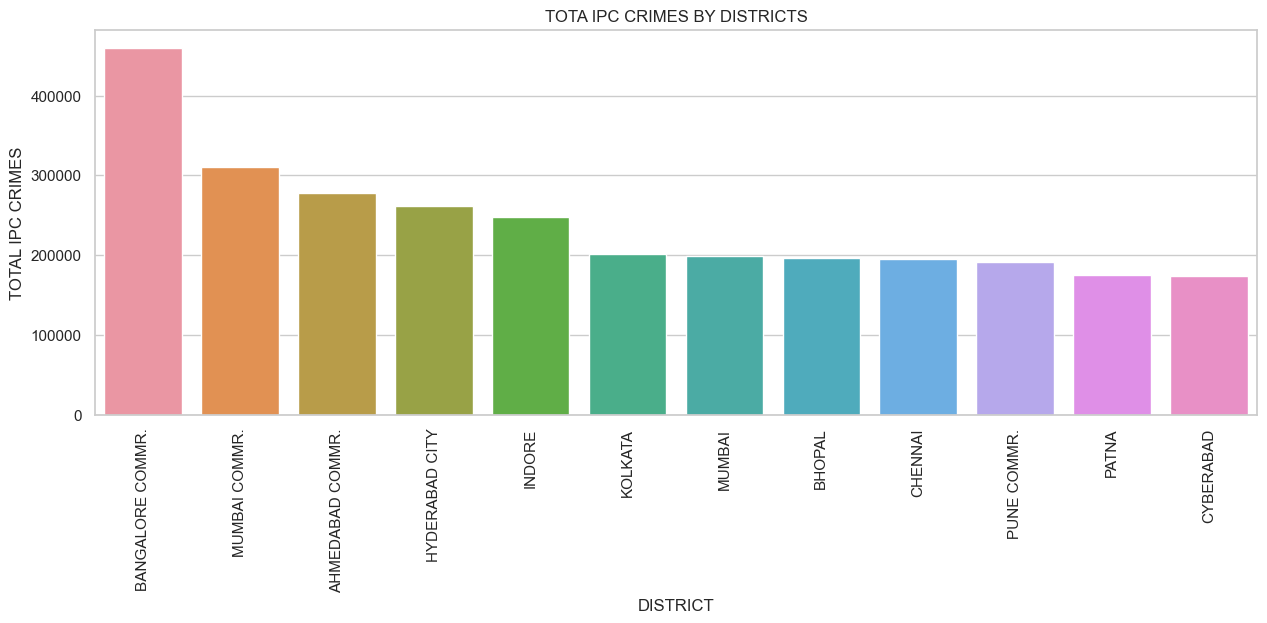

In [84]:
# Bar graph: TOTA IPC CRIMES BY DISTRICTS
sns.set(style = 'whitegrid')
plt.figure(figsize = (15, 5))
sns.barplot(x = 'DISTRICT', y = 'TOTAL IPC CRIMES', data = sensitive_areas)
plt.title('TOTA IPC CRIMES BY DISTRICTS')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
The bar graph shows Bangalore Commissionerate has the highest total IPC crimes, followed by Mumbai Commissionerate and Ahmedabad Commissionerate. Patna and Cyberabad have relatively lower total IPC crimes compared to the other districts.

### Factors Impacting more crimes in sensitive areas:
#### Population Density:
Higher in urban areas, contributing to increased crime.

#### Economic Conditions:
Poverty and unemployment may lead to higher crime rates.

#### Law Enforcement:
Effective law enforcement and more police can help stop crime.

#### Social Issues:
Problems in society like inequality and education can affect crime.

#### Geographic Factors:
Being close to borders or big transportation hubs can affect crime rates.

### 2. What needs to be done to reduce crime.

Reducing crime is a complex task that involves addressing various social, economic, and systemic factors. Here are several strategies and considerations that can contribute to crime reduction:

#### Community Policing:
Foster positive relationships between law enforcement and the community. Encourage community involvement in crime prevention efforts.

#### Education and Employment Opportunities:
Improve access to education and vocational training to enhance job prospects. Reduce poverty and unemployment, addressing root causes of crime.

#### Mental Health Services:
Increase access to mental health resources and support. Addressing mental health issues can reduce the likelihood of certain crimes.

#### Youth Engagement Programs:
Provide constructive activities and programs for young people. Engage youth in positive community initiatives to prevent delinquency.

#### Drug and Substance Abuse Prevention:
Implement and support programs to prevent substance abuse. Treatment and rehabilitation for individuals struggling with addiction.

#### Community Empowerment:
Empower communities to address local issues and implement solutions. Encourage residents to take pride in their neighborhoods.

#### Improved Lighting and Infrastructure:
Enhance public spaces with better lighting and well-maintained infrastructure. Create environments that discourage criminal activities.

#### Restorative Justice Programs:
Implement restorative justice initiatives that focus on rehabilitation and reconciliation. Encourage accountability and understanding between offenders and victims.

#### Technology and Surveillance:
Use technology for crime analysis and predictive policing. Implement effective surveillance systems in public spaces.

#### Social Support Services:
Strengthen social services to support vulnerable populations. Provide resources for at-risk individuals and families.

#### Legal Reforms:
Evaluate and reform laws to ensure fairness and effectiveness. Address systemic issues that contribute to crime.

#### Early Intervention Programs:
Identify and address risk factors in individuals at an early age. Provide support and resources to prevent criminal behavior.

####  Data-Driven Approaches:
Utilize data to identify crime trends and allocate resources effectively. Implement evidence-based policies and interventions.

### 3. Most safe and unsafe districts.

#### Most safe districts

In [85]:
# Sorting the DataFrame 'peaceful_areas' based on the 'TOTAL IPC CRIMES' column in ascending order
peaceful_areas = peaceful_areas.sort_values(by = 'TOTAL IPC CRIMES', ascending = True)

In [86]:
peaceful_areas[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']].head(10)

,STATE/UT,DISTRICT,TOTAL IPC CRIMES
181,DELHI,S.T.F.,0
290,JAMMU & KASHMIR,RAILWAYS KATRA,4
695,TRIPURA,G.R.P.,9
490,MANIPUR,CID,9
291,JAMMU & KASHMIR,RAILWAYS KMR,10
254,HIMACHAL PRADESH,CID,15
60,ASSAM,BIEO,16
2,A & N ISLANDS,CAR,29
697,TRIPURA,GRP,29
288,JAMMU & KASHMIR,RAILWAYS JAMMU,35


The safest districts from 2001 to 2012 in India were S.T.F., Railways Katra, G.R.P., CID, Railways KMR, BIEO, CAR, GRP, Railways Jammu.

#### Most unsafe districts

In [87]:
# Sorting the DataFrame 'sensitive_areas' based on the 'TOTAL IPC CRIMES' column in descending order
sensitive_areas = sensitive_areas.sort_values(by = 'TOTAL IPC CRIMES', ascending = False)

In [88]:
sensitive_areas[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']].head(10)

,STATE/UT,DISTRICT,TOTAL IPC CRIMES
327,KARNATAKA,BANGALORE COMMR.,459437
460,MAHARASHTRA,MUMBAI COMMR.,310755
191,GUJARAT,AHMEDABAD COMMR.,278467
15,ANDHRA PRADESH,HYDERABAD CITY,261276
409,MADHYA PRADESH,INDORE,247160
812,WEST BENGAL,KOLKATA,201713
459,MAHARASHTRA,MUMBAI,198320
395,MADHYA PRADESH,BHOPAL,196550
654,TAMIL NADU,CHENNAI,195004
472,MAHARASHTRA,PUNE COMMR.,190804


The unsafest districts from 2001 to 2012 in India were Bangalore Commissionerate, Mumbai Commissionerate, Ahmedabad Commissionerate, Hyderabad City, Indore, Kolkata, Mumbai, Bhopal, Chennai, and Pune Commissionerate.

### 4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze).

In [89]:
# Analysis of district wise crimes against children in senstive areas
crimes_data = sensitive_areas.sort_values(by = 'TOTAL CRIMES AGAINST CHILDREN')
crimes_data[['STATE/UT', 'DISTRICT', 'TOTAL CRIMES AGAINST CHILDREN']]

,STATE/UT,DISTRICT,TOTAL CRIMES AGAINST CHILDREN
10,ANDHRA PRADESH,CYBERABAD,296.0
654,TAMIL NADU,CHENNAI,474.0
327,KARNATAKA,BANGALORE COMMR.,675.0
15,ANDHRA PRADESH,HYDERABAD CITY,872.0
121,BIHAR,PATNA,893.0
459,MAHARASHTRA,MUMBAI,1021.0
395,MADHYA PRADESH,BHOPAL,1326.0
191,GUJARAT,AHMEDABAD COMMR.,1435.0
812,WEST BENGAL,KOLKATA,1730.0
460,MAHARASHTRA,MUMBAI COMMR.,2865.0


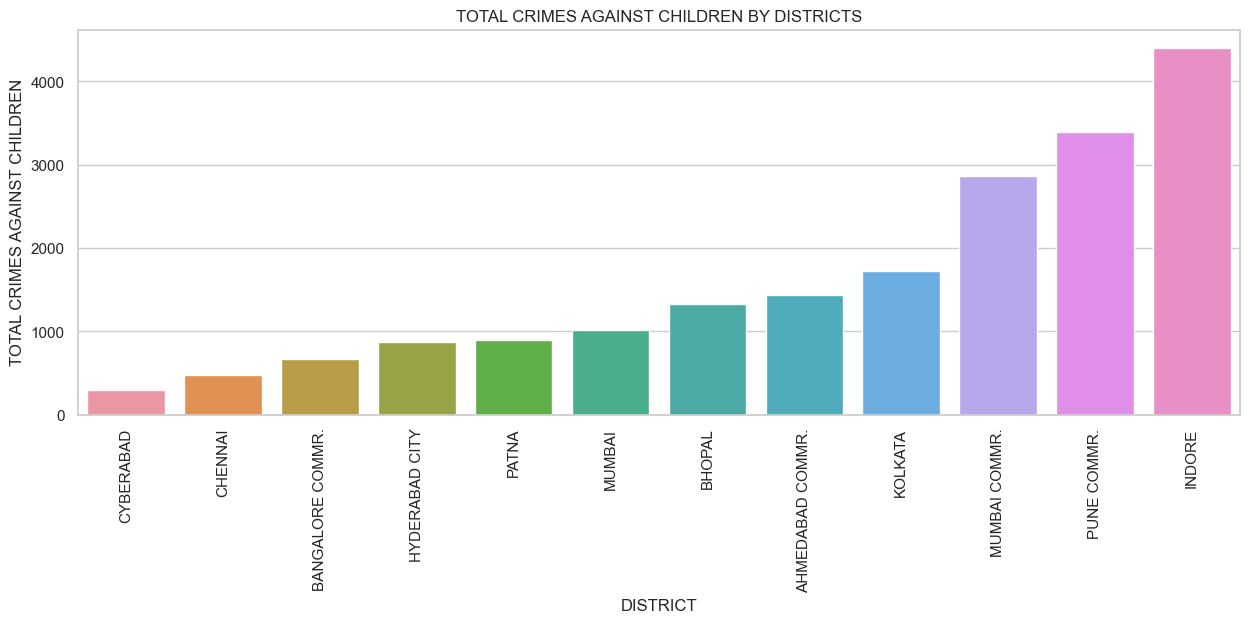

In [90]:
# Bar graph: TOTAL CRIMES AGAINST CHILDREN BY DISTRICTS
plt.figure(figsize = (15, 5))
sns.barplot(x = 'DISTRICT', y = 'TOTAL CRIMES AGAINST CHILDREN', data = sensitive_areas.sort_values(by = 'TOTAL CRIMES AGAINST CHILDREN'))
plt.title('TOTAL CRIMES AGAINST CHILDREN BY DISTRICTS')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
The bar graph on crimes against children reveals notable variations across different districts in India. Cyberabad in Andhra Pradesh reported 296.0 cases, showcasing a relatively lower incidence, while Chennai in Tamil Nadu follows with 474.0 cases. Bangalore Commr. in Karnataka recorded 675.0 crimes against children, and Hyderabad City in Andhra Pradesh reported a higher figure of 872.0 cases. Patna in Bihar witnessed 893.0 cases, indicating regional differences. Mumbai in Maharashtra reported 1021.0 cases, and Bhopal in Madhya Pradesh recorded a higher number at 1326.0 crimes against children. Ahmedabad Commr. in Gujarat reported 1435.0 cases, while Kolkata in West Bengal recorded 1730.0 cases. The situation is more concerning in Mumbai Commr. (Maharashtra) with 2865.0 cases and Pune Commr. (Maharashtra) with 3391.0 cases, emphasizing the need for targeted strategies in specific districts to address crimes against children effectively. Indore in Madhya Pradesh reported a substantial number of cases at 4401.0, indicating the complex challenges faced by different districts in ensuring the safety of children.

In [91]:
# Analysis of district wise crimes against women in senstive areas
crimes_data = sensitive_areas.sort_values(by = 'TOTAL CRIMES AGAINST WOMEN')
crimes_data[['STATE/UT', 'DISTRICT', 'TOTAL CRIMES AGAINST WOMEN']]

,STATE/UT,DISTRICT,TOTAL CRIMES AGAINST WOMEN
459,MAHARASHTRA,MUMBAI,4251
121,BIHAR,PATNA,5931
472,MAHARASHTRA,PUNE COMMR.,6283
654,TAMIL NADU,CHENNAI,6469
395,MADHYA PRADESH,BHOPAL,7087
327,KARNATAKA,BANGALORE COMMR.,9010
460,MAHARASHTRA,MUMBAI COMMR.,9304
812,WEST BENGAL,KOLKATA,9797
409,MADHYA PRADESH,INDORE,10392
191,GUJARAT,AHMEDABAD COMMR.,14973


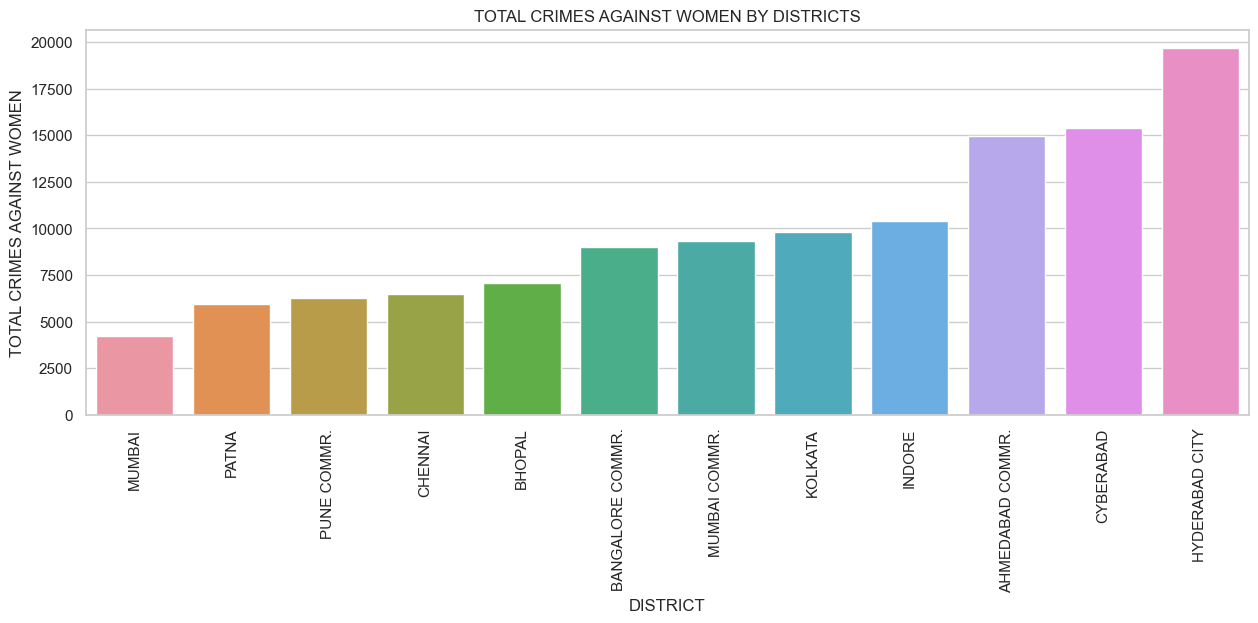

In [92]:
# Bar graph: TOTAL CRIMES AGAINST WOMEN BY DISTRICTS
plt.figure(figsize = (15, 5))
sns.barplot(x = 'DISTRICT', y = 'TOTAL CRIMES AGAINST WOMEN', data = sensitive_areas.sort_values(by = 'TOTAL CRIMES AGAINST WOMEN'))
plt.title('TOTAL CRIMES AGAINST WOMEN BY DISTRICTS')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
The bar graph on crimes against women underscores significant variations across districts in India. Mumbai in Maharashtra reported 4251 cases, while Patna in Bihar witnessed 5931 cases, indicating regional disparities. Pune Commr. (Maharashtra) recorded 6283 cases, and Chennai in Tamil Nadu reported 6469 cases. Bhopal in Madhya Pradesh experienced 7087 cases, emphasizing the need for targeted interventions. Bangalore Commr. in Karnataka reported a higher incidence with 9010 cases, indicating challenges in addressing crimes against women. Mumbai Commr. (Maharashtra) witnessed 9304 cases, reflecting the complex nature of the issue. Kolkata in West Bengal recorded 9797 cases, and Indore in Madhya Pradesh reported 10392 cases, highlighting the multifaceted challenges in ensuring the safety of women. Ahmedabad Commr. in Gujarat reported 14973 cases, and Cyberabad in Andhra Pradesh recorded 15411 cases, signifying the need for comprehensive strategies. Hyderabad City in Andhra Pradesh reported a higher number with 19685 cases, indicating the urgency of addressing crimes against women in specific districts.

In [93]:
# Analysis of distric wise crimes against SCs in senstive areas
crimes_data = sensitive_areas.sort_values(by = 'TOTAL CRIMES AGAINST SCs')
crimes_data[['STATE/UT', 'DISTRICT', 'TOTAL CRIMES AGAINST SCs']]

,STATE/UT,DISTRICT,TOTAL CRIMES AGAINST SCs
812,WEST BENGAL,KOLKATA,17
459,MAHARASHTRA,MUMBAI,67
654,TAMIL NADU,CHENNAI,132
460,MAHARASHTRA,MUMBAI COMMR.,186
472,MAHARASHTRA,PUNE COMMR.,193
191,GUJARAT,AHMEDABAD COMMR.,798
409,MADHYA PRADESH,INDORE,1139
15,ANDHRA PRADESH,HYDERABAD CITY,1293
327,KARNATAKA,BANGALORE COMMR.,1423
121,BIHAR,PATNA,1503


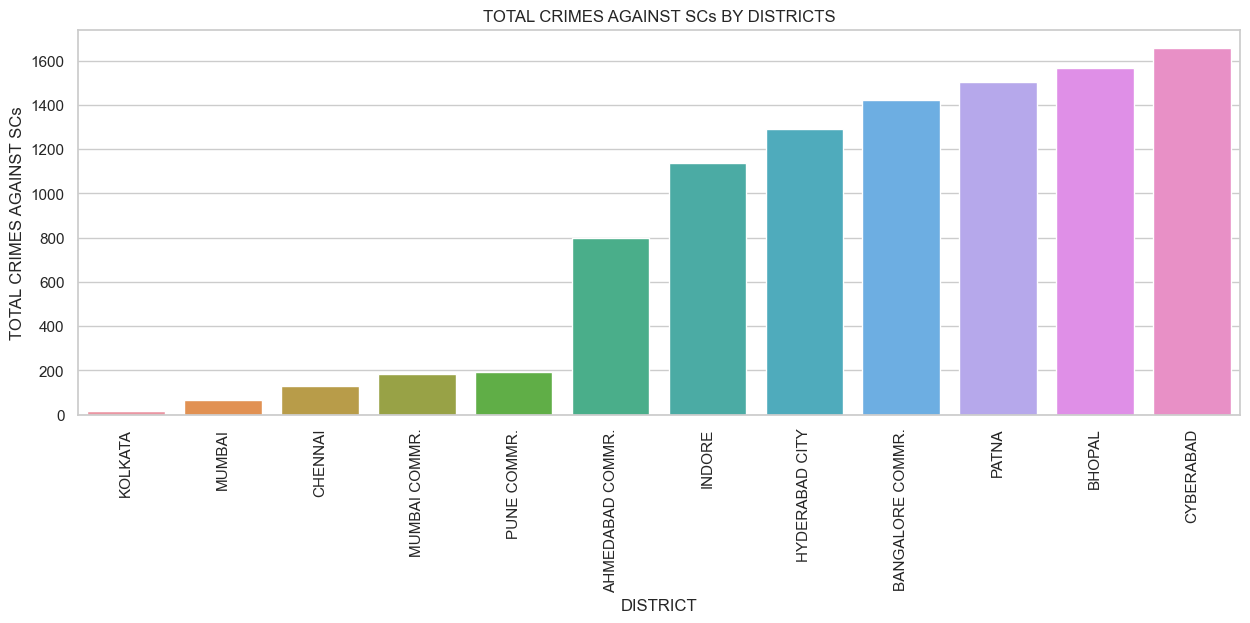

In [94]:
# Bar graph: TOTAL CRIMES AGAINST SCs BY DISTRICTS
plt.figure(figsize = (15, 5))
sns.barplot(x = 'DISTRICT', y = 'TOTAL CRIMES AGAINST SCs', data = sensitive_areas.sort_values(by = 'TOTAL CRIMES AGAINST SCs'))
plt.title('TOTAL CRIMES AGAINST SCs BY DISTRICTS')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
The bar graph on crimes against Scheduled Castes (SCs) reveals disparities across districts in various states and Union Territories. Kolkata in West Bengal reported 17 cases, while Mumbai in Maharashtra recorded 67 cases, indicating variations in the incidence of crimes against SCs. Chennai in Tamil Nadu witnessed 132 cases, and Mumbai Commr. (Maharashtra) reported 186 cases. Pune Commr. (Maharashtra) recorded 193 cases, emphasizing the need for targeted interventions in specific districts. Ahmedabad Commr. in Gujarat reported 798 cases, highlighting challenges related to crimes against SCs. Indore in Madhya Pradesh witnessed 1139 cases, and Hyderabad City in Andhra Pradesh recorded 1293 cases, reflecting the complex nature of the issue in these districts. Bangalore Commr. in Karnataka reported 1423 cases, while Patna in Bihar witnessed 1503 cases. Bhopal in Madhya Pradesh experienced 1565 cases, and Cyberabad in Andhra Pradesh recorded 1657 cases, signifying the need for comprehensive strategies to address crimes against SCs in specific districts.

In [95]:
# Analysis of district wise crimes against STs in senstive areas
crimes_data = sensitive_areas.sort_values(by = 'TOTAL CRIMES AGAINST STs').head(10)
crimes_data[['STATE/UT', 'DISTRICT', 'TOTAL CRIMES AGAINST STs']]

,STATE/UT,DISTRICT,TOTAL CRIMES AGAINST STs
654,TAMIL NADU,CHENNAI,0
812,WEST BENGAL,KOLKATA,1
459,MAHARASHTRA,MUMBAI,2
472,MAHARASHTRA,PUNE COMMR.,3
460,MAHARASHTRA,MUMBAI COMMR.,11
327,KARNATAKA,BANGALORE COMMR.,16
121,BIHAR,PATNA,33
191,GUJARAT,AHMEDABAD COMMR.,41
15,ANDHRA PRADESH,HYDERABAD CITY,76
395,MADHYA PRADESH,BHOPAL,226


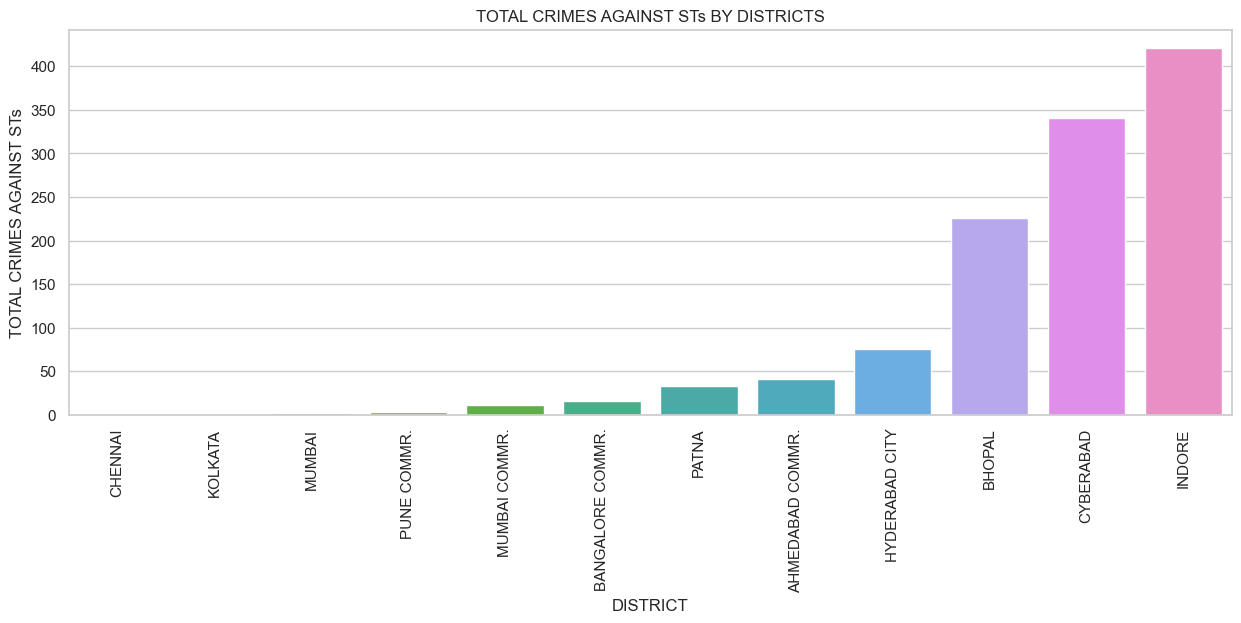

In [96]:
# Bar graph: TOTAL CRIMES AGAINST STs BY DISTRICTS
plt.figure(figsize = (15, 5))
sns.barplot(x = 'DISTRICT', y = 'TOTAL CRIMES AGAINST STs', data = sensitive_areas.sort_values(by = 'TOTAL CRIMES AGAINST STs'))
plt.title('TOTAL CRIMES AGAINST STs BY DISTRICTS')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
The bar graph on crimes against Scheduled Tribes (STs) reflects variations across districts in different states and Union Territories. Chennai in Tamil Nadu reported 0 cases, indicating a relatively lower incidence of crimes against STs in the district. Kolkata in West Bengal recorded 1 case, while Mumbai in Maharashtra reported 2 cases. Pune Commr. (Maharashtra) witnessed 3 cases, and Mumbai Commr. (Maharashtra) reported 11 cases, emphasizing the need for attention to the issue in specific districts. Bangalore Commr. in Karnataka recorded 16 cases, and Patna in Bihar witnessed 33 cases. Ahmedabad Commr. in Gujarat reported 41 cases, while Hyderabad City in Andhra Pradesh recorded 76 cases. Bhopal in Madhya Pradesh witnessed 226 cases, underscoring the importance of targeted interventions to address crimes against STs in specific districts.

In [97]:
# Analysis of district wise total IPC crimes in moderate areas
crimes_data = moderate_areas.sort_values(by = 'TOTAL IPC CRIMES', ascending = False).head(10)
crimes_data[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']]

,STATE/UT,DISTRICT,TOTAL IPC CRIMES
753,UTTAR PRADESH,LUCKNOW,150796
794,WEST BENGAL,24 PARGANAS NORTH,149975
795,WEST BENGAL,24 PARGANAS SOUTH,143768
182,DELHI,SOUTH,136324
462,MAHARASHTRA,NAGPUR COMMR.,133110
411,MADHYA PRADESH,JABALPUR,132563
406,MADHYA PRADESH,GWALIOR,131577
482,MAHARASHTRA,THANE COMMR.,130500
600,RAJASTHAN,ALWAR,121539
620,RAJASTHAN,JAIPUR,118473


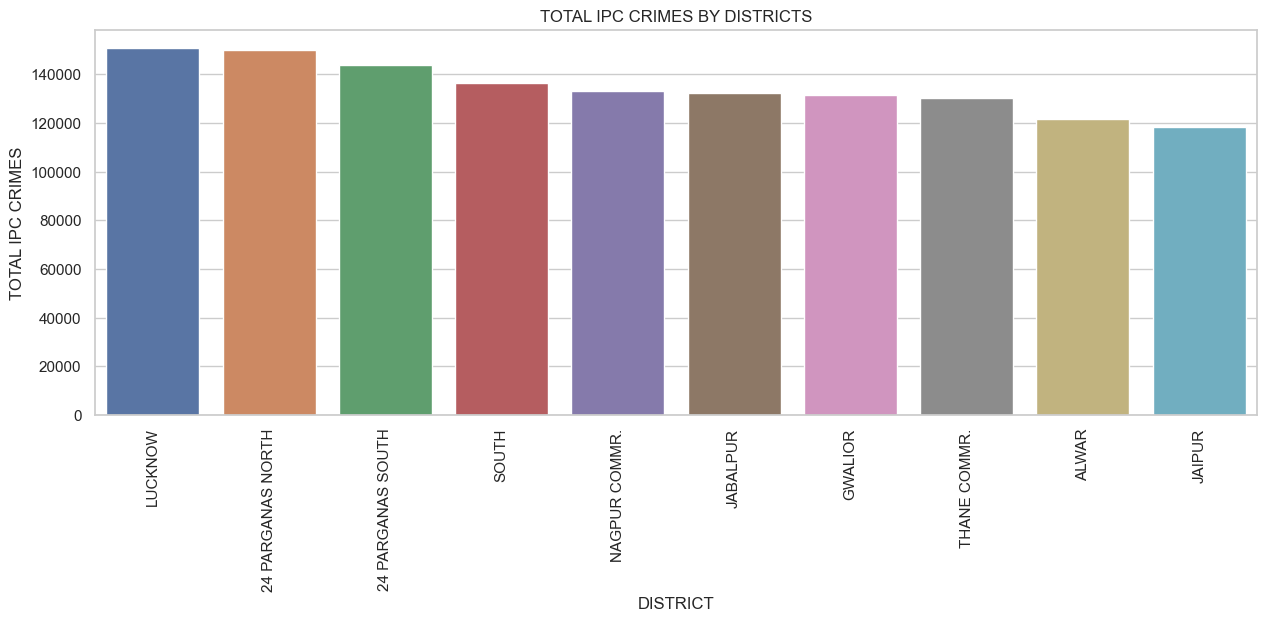

In [98]:
# Bar graph: TOTAL IPC CRIMES BY DISTRICTS
plt.figure(figsize = (15, 5))
sns.barplot(x = 'DISTRICT', y = 'TOTAL IPC CRIMES', data = moderate_areas.sort_values(by = 'TOTAL IPC CRIMES', ascending = False).head(10))
plt.title('TOTAL IPC CRIMES BY DISTRICTS')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
The bar graph on Total IPC crimes across various states and Union Territories in moderate areas reveals noteworthy patterns. Lucknow in Uttar Pradesh reported the highest number of IPC crimes among the specified districts, with a total of 150,796 cases. 24 Parganas North and 24 Parganas South in West Bengal recorded 149,975 and 143,768 cases, respectively, indicating a high incidence of IPC crimes in these districts. South Delhi witnessed 136,324 cases, making it one of the districts with substantial criminal activity. Nagpur Commr. in Maharashtra reported 133,110 cases, while Jabalpur and Gwalior in Madhya Pradesh recorded 132,563 and 131,577 cases, respectively. Thane Commr. in Maharashtra reported 130,500 cases, and Alwar in Rajasthan witnessed 121,539 cases. Jaipur in Rajasthan recorded 118,473 cases, highlighting the need for focused efforts to address and prevent IPC crimes in these districts.

In [99]:
# Analysis of district wise total IPC crimes in peaceful areas
crimes_data = peaceful_areas.sort_values(by = 'TOTAL IPC CRIMES').head(10)
crimes_data[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']]

,STATE/UT,DISTRICT,TOTAL IPC CRIMES
181,DELHI,S.T.F.,0
290,JAMMU & KASHMIR,RAILWAYS KATRA,4
695,TRIPURA,G.R.P.,9
490,MANIPUR,CID,9
291,JAMMU & KASHMIR,RAILWAYS KMR,10
254,HIMACHAL PRADESH,CID,15
60,ASSAM,BIEO,16
2,A & N ISLANDS,CAR,29
697,TRIPURA,GRP,29
288,JAMMU & KASHMIR,RAILWAYS JAMMU,35


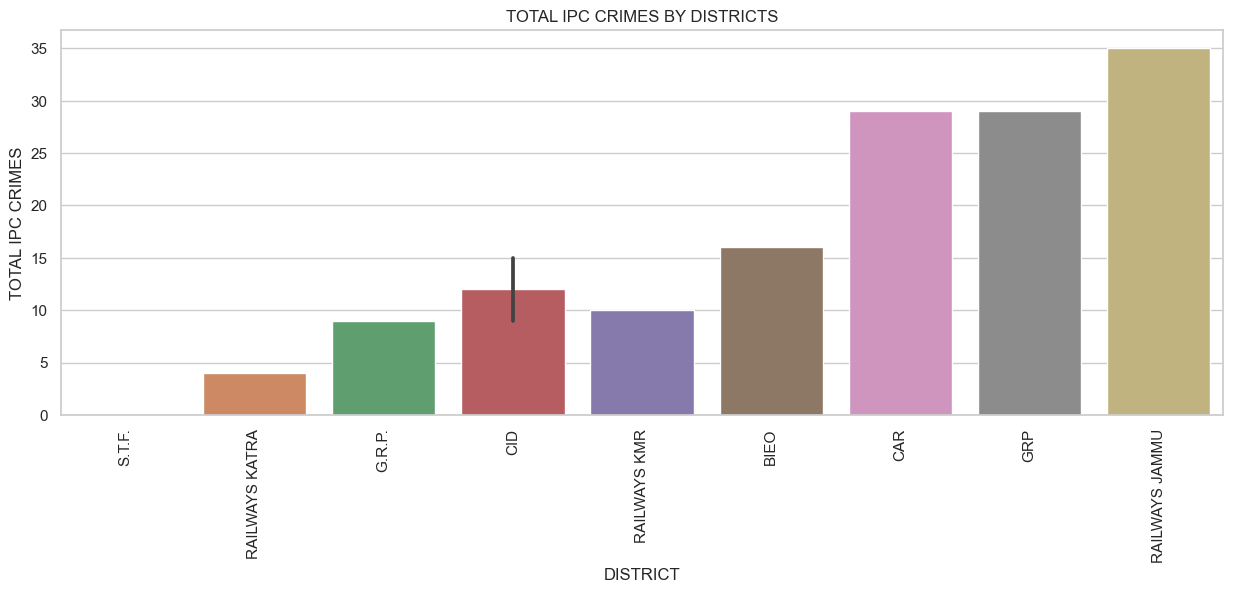

In [100]:
# Bar graph: TOTAL IPC CRIMES BY DISTRICTS
plt.figure(figsize = (15, 5))
sns.barplot(x = 'DISTRICT', y = 'TOTAL IPC CRIMES', data = peaceful_areas.sort_values(by = 'TOTAL IPC CRIMES').head(10))
plt.title('TOTAL IPC CRIMES BY DISTRICTS')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
The bar graph on total IPC crimes in specialized districts across various states and Union Territories reflects relatively lower numbers. The Special Task Force (S.T.F.) district in Delhi reported no IPC crimes during this period. Railways Katra in Jammu & Kashmir recorded 4 cases, while the Government Railway Police (G.R.P.) district in Tripura reported 9 cases. The CID district in Manipur also reported 9 cases. Railways KMR in Jammu & Kashmir recorded 10 cases, and the CID district in Himachal Pradesh reported 15 cases. BIEO in Assam recorded 16 cases, while the Crime Against Railways (CAR) district in A & N Islands reported 29 cases. The GRP districts in Tripura and Railways Jammu in Jammu & Kashmir reported 29 and 35 cases, respectively. 

### Calculating percentage share of each crime to the overall crime in sensitive areas

In [101]:
# Calculating percentage share of each crime to the overall crimes
crime_columns = sensitive_areas.columns[2:31] #Exclude non-crime columns
crime_percentage_share = (sensitive_areas[crime_columns].div(sensitive_areas['TOTAL IPC CRIMES'], axis = 0) * 100).round(2)

crime_percentage_share.set_index(sensitive_areas['DISTRICT'], inplace = True)

# Display the resulting DataFrame with crime percentage share
crime_percentage_share.T

DISTRICT,BANGALORE COMMR.,MUMBAI COMMR.,AHMEDABAD COMMR.,HYDERABAD CITY,INDORE,KOLKATA,MUMBAI,BHOPAL,CHENNAI,PUNE COMMR.,PATNA,CYBERABAD
MURDER,0.62,0.50,0.43,0.56,0.54,0.30,0.63,0.42,0.70,0.69,2.61,1.04
ATTEMPT TO MURDER,0.89,0.34,0.28,0.60,0.73,0.57,0.36,0.56,1.39,0.59,1.62,0.53
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,0.01,0.01,0.04,0.02,0.02,0.13,0.02,0.02,0.02,0.03,0.17,0.06
RAPE,0.14,0.45,0.18,0.27,0.51,0.21,0.39,0.65,0.27,0.44,0.33,0.37
CUSTODIAL RAPE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
OTHER RAPE,0.14,0.45,0.18,0.27,0.51,0.21,0.39,0.65,0.27,0.44,0.33,0.37
KIDNAPPING & ABDUCTION,0.66,0.43,0.83,0.56,0.25,0.76,0.40,0.31,0.32,0.57,1.99,0.81
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,0.21,0.29,0.60,0.26,0.19,0.58,0.20,0.25,0.19,0.41,0.67,0.49
KIDNAPPING AND ABDUCTION OF OTHERS,0.45,0.14,0.23,0.30,0.07,0.18,0.20,0.06,0.13,0.16,1.33,0.31
DACOITY,0.12,0.07,0.17,0.05,0.03,0.07,0.11,0.02,0.04,0.16,0.54,0.08


The most frequently reported crimes in sensitive areas include 'Burglary,' 'Theft,' 'Auto Theft,' 'Other Theft,' 'Cheating,' 'Hurt/Grievous Hurt,' 'Cruelty by Husband or His Relatives,' and 'Causing Death by Negligence.'

In [102]:
# Calculating percentage share of most frequently reported crimes in sensitive areas
crimes_share = crime_percentage_share[['BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'CHEATING', 'HURT/GREVIOUS HURT', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'CAUSING DEATH BY NEGLIGENCE']].sum(axis = 1).round(2)

In [103]:
crimes_share

DISTRICT
BANGALORE COMMR.    65.36
MUMBAI COMMR.       77.31
AHMEDABAD COMMR.    56.75
HYDERABAD CITY      82.53
INDORE              50.22
KOLKATA             63.22
MUMBAI              77.55
BHOPAL              41.52
CHENNAI             49.28
PUNE COMMR.         73.13
PATNA               42.46
CYBERABAD           77.63
dtype: float64

Bangalore: 65.36% of reported crimes involve Burglary, Theft, Auto Theft, Other Theft, Cheating, Hurt/Grievous Hurt, Cruelty by Husband or His Relatives, and Causing Death by Negligence.

Mumbai: 77.31% of reported crimes fall within the specified crime categories.

Ahmedabad: 56.75% of reported crimes are associated with Burglary, Theft, Auto Theft, Other Theft, Cheating, Hurt/Grievous Hurt, Cruelty by Husband or His Relatives, and Causing Death by Negligence.

Hyderabad City: A significant 82.53% of reported crimes involve the specified crime types.

Indore: 50.22% of reported crimes are related to Burglary, Theft, Auto Theft, Other Theft, Cheating, Hurt/Grievous Hurt, Cruelty by Husband or His Relatives, and Causing Death by Negligence.

Kolkata: 63.22% of reported crimes fall within the specified crime categories.

Pune: 73.13% of reported crimes involve Burglary, Theft, Auto Theft, Other Theft, Cheating, Hurt/Grievous Hurt, Cruelty by Husband or His Relatives, and Causing Death by Negligence.

Cyberabad: 77.63% of reported crimes are associated with the specified crime types.

Mumbai (City): 77.55% of reported crimes fall within the specified crime categories.

Chennai: 49.28% of reported crimes are related to Burglary, Theft, Auto Theft, Other Theft, Cheating, Hurt/Grievous Hurt, Cruelty by Husband or His Relatives, and Causing Death by Negligence.

Bhopal: 41.52% of reported crimes involve the specified crime types.

Patna: 42.46% of reported crimes are associated with Burglary, Theft, Auto Theft, Other Theft, Cheating, Hurt/Grievous Hurt, Cruelty by Husband or His Relatives, and Causing Death by Negligence.

### 4.4   Capstone project overall story in your own words. Min 1000 words.

From 2001 to 2012, India witnessed a diverse and complex landscape of crime. Here's an overall story based on the analysis of Crimes in India:

#### Widespread Criminal Incidents:
Crime pervaded the nation, with high instances of murder, rape, and kidnapping reported across various states and Union Territories.

#### Concerns for Women and Children:
Significant concerns included crimes against women, such as rape and dowry deaths, and incidents of crimes against children, highlighting the vulnerability of these demographics.

#### Societal Challenges Reflected in Crime Data:
Deep-seated societal challenges were evident, seen in crimes like dowry deaths, offenses against Scheduled Castes (SCs) and Scheduled Tribes (STs), and the prevalence of riots.

#### Urban Challenges:
Urban areas, exemplified by Delhi, faced a substantial burden of crime, pointing to challenges associated with densely populated metropolitan regions.

#### Socio-Economic Disparities:
States with higher literacy rates and better socio-economic development generally reported lower crime rates, emphasizing the link between education, economic prosperity, and crime prevention.

#### Law Enforcement Challenges:
The high overall incidence of crimes indicated persistent challenges for law enforcement agencies in maintaining public safety and combating a wide range of criminal activities.

#### Complex Regional Dynamics:
Different states exhibited diverse patterns of crime, reflecting the complex interplay of regional dynamics, cultural factors, and socio-economic conditions.

#### Total IPC Crimes:
The cumulative total of IPC crimes across the country during this period was substantial, highlighting the need for comprehensive strategies to address and prevent criminal activities.

#### Criminal Justice System Pressures:
The sheer volume of reported crimes indicated significant pressures on the criminal justice system, including the police, judiciary, and correctional facilities.

#### Opportunities for Improvement:
The crime data provides valuable insights for policymakers, law enforcement, and communities to identify areas for improvement, implement targeted interventions, and work collaboratively towards enhancing public safety.


#### Overview of Crimes in different States and UTs:
During the period from 2001 to 2012, certain states and Union Territories (UTs) in India demonstrated distinctive patterns in crime rates. States such as Andhra Pradesh, Bihar, Delhi, Madhya Pradesh, Maharashtra, and Uttar Pradesh experienced notably high crime rates across various categories, including murder, rape, and kidnapping. These regions faced complex challenges, reflecting both urban and socio-economic dynamics.

In contrast, states like Arunachal Pradesh, Goa, and Sikkim reported comparatively lower crime rates, signaling a relatively more secure environment. These states showcased a trend of better law and order, potentially influenced by factors such as lower population density, cultural dynamics, and effective law enforcement. The variations in crime rates underscore the diverse socio-economic and regional factors influencing the overall safety and security landscape across different states and UTs in India during this period.

The crime landscape extended beyond violent offenses, revealing pervasive issues such as theft, which reached substantial numbers in states like Delhi and Maharashtra. Instances of riots, reflecting social unrest, were also reported extensively in states like Uttar Pradesh and Madhya Pradesh. Dowry deaths, a societal concern, were particularly notable in states with higher crime rates, including Andhra Pradesh and Bihar. Crimes against children and women, encompassing a range of offenses, were prevalent in these high-crime regions, with Uttar Pradesh and Madhya Pradesh reporting significant figures.

Moreover, significant cases of crimes against Scheduled Castes (SCs) and Scheduled Tribes (STs) were reported. The vulnerability of these marginalized communities was evident in the reported figures, with higher counts in states like Uttar Pradesh and Madhya Pradesh. The data indicated a concerning intersectionality between crime rates and caste dynamics, emphasizing the need for targeted interventions and social reforms.

Conversely, states with comparatively lower overall crime rates, such as Arunachal Pradesh, Goa, and Sikkim, also reported fewer instances of crimes against SCs and STs. The relatively secure environment in these states extended to a lower incidence of crimes targeting marginalized communities.

#### Focus Areas for Improvement:
States like Bihar, Madhya Pradesh, and Uttar Pradesh consistently appeared with high crime rates across various categories, indicating the need for targeted intervention strategies, law enforcement reforms, and social development initiatives.